# Test profit feedbacks

In [116]:
using Plots
include("SurplusProduction.jl")
include("BaseParams.jl")

Main.BaseParams

In [ ]:
price = BaseParams.price
price = 20.0
NCV_weight = 0.0
model = SurplusProduction.init_simple_profit_feedback(
            BaseParams.Fmsy, BaseParams.buffer, BaseParams.tau, BaseParams.sigma_a,
            BaseParams.sigma_p, NCV_weight, price, 
            BaseParams.c, BaseParams.b,BaseParams.discount;
            mQuad = 25,N =75,CVmax = 1.0,Bmax = 3.0,Bmin = 0.05, threashold = 10^-4.5)
nothing

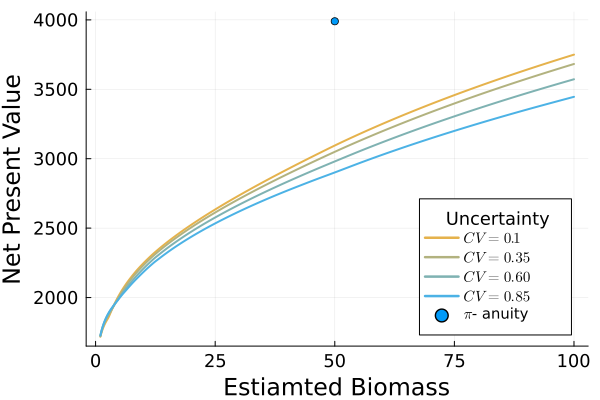

In [144]:
using Colors
using LaTeXStrings
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.Value([mu,Var])
    end
end 

plt = Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Net Present Value", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 10,legendtitlefontsize = 12, legendposition = :bottomright,
            labelfontsize = 16, tickfontsize = 12)
Bmsy = BaseParams.MSY/BaseParams.Fmsy
pi_anuity = (price*BaseParams.MSY-BaseParams.c*BaseParams.MSY/Bmsy)*  (1 + 1/BaseParams.discount)
Plots.scatter!([Bmsy],[pi_anuity], label = string(L"\pi", "- anuity"), c = 1)
plt

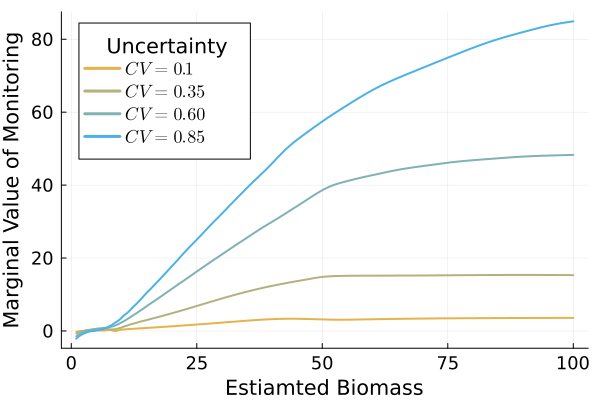

In [145]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.VoI([mu,Var])
    end
end 

plt=Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Marginal Value of Monitoring", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
plt

# Simpler model

In [ ]:
using Plots
include("SurplusProduction.jl")
include("BaseParams.jl")
Fmsy = BaseParams.Fmsy
MSY = BaseParams.MSY
NCV_weight = 0.0
H_weight = 5.0
model=SurplusProduction.init_simpler( 
                BaseParams.Fmsy, # fishing mortaltiy rate at maximum sustainable yield
                BaseParams.buffer, # p-star
                BaseParams.tau, # process noice
                BaseParams.sigma_a, # active monitoring noise
                BaseParams.sigma_p, # passive monitoring noise
                H_weight, # harvets weight
                NCV_weight, # nonconsumptive values weight
                BaseParams.c1, # stock dependent costs 
                BaseParams.c2, # saturating / nonlinear costs
                BaseParams.b, # nonconsumptive values risk aversion 
                BaseParams.discount;
                mQuad = 25,
                N =100,CVmax = 1.5,
                Bmax = 3.0,Bmin = 0.01,threashold = 10^-5)
nothing

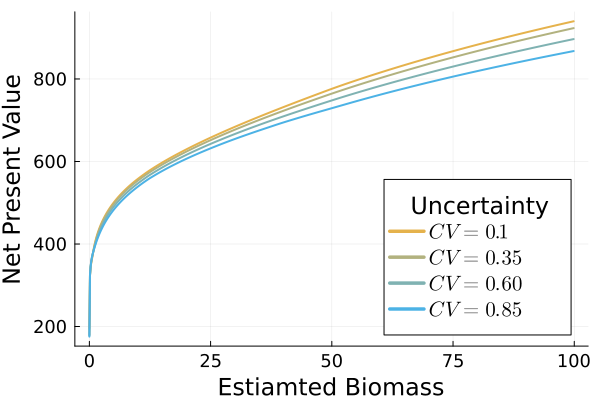

In [150]:
using Colors
using LaTeXStrings
Bhat = (0.001:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.Value([mu,Var])
    end
end 

plt = Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Net Present Value", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 14,legendtitlefontsize = 16, legendposition = :bottomright,
            labelfontsize = 16, tickfontsize = 12)

plt

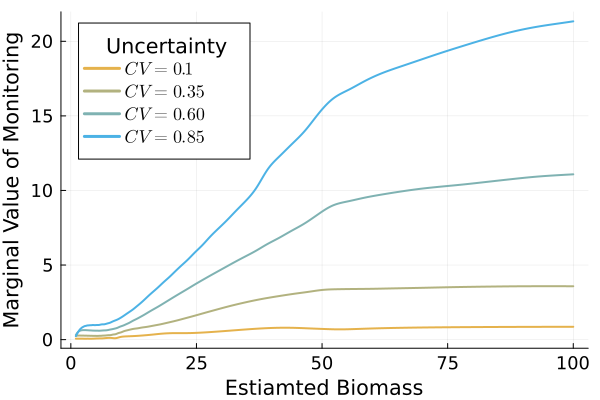

In [151]:
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.1,0.35,0.6,0.85]
acc = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc[i,j] = model.VoI([mu,Var])
    end
end 

plt=Plots.plot(Bhat,acc[:,1],label = L"CV = 0.1",c = Colors.RGB(0.9,0.7,0.3), width = 2)
Plots.plot!(Bhat,acc[:,2],label = L"CV = 0.35",c = Colors.RGB(0.7,0.7,0.5), width = 2)
Plots.plot!(Bhat,acc[:,3],label = L"CV = 0.60",c = Colors.RGB(0.5,0.7,0.7), width = 2)
Plots.plot!(Bhat,acc[:,4],label = L"CV = 0.85",c = Colors.RGB(0.3,0.7,0.9), width = 2,
            ylabel = "Marginal Value of Monitoring", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :topleft,
            labelfontsize = 14, tickfontsize = 12)
plt

# Plot HCR

In [ ]:
using Plots
include("SurplusProduction.jl")
include("BaseParams.jl")
model_01=SurplusProduction.init_simpler( 
                BaseParams.Fmsy, BaseParams.buffer, BaseParams.tau, BaseParams.sigma_a, 
                BaseParams.sigma_p, BaseParams.H_weight, BaseParams.NCV_weight, 
                BaseParams.c1,BaseParams.c2, BaseParams.b, BaseParams.discount;
                mQuad = 25,N =200,CVmax = 1.5, Bmax = 3.0,Bmin = 0.01,threashold = 10^-5)

model_025=SurplusProduction.init_simpler( 
                BaseParams.Fmsy, BaseParams.buffer, BaseParams.tau, BaseParams.sigma_a, 
                BaseParams.sigma_p, BaseParams.H_weight, BaseParams.NCV_weight, 
                BaseParams.c1,BaseParams.c2, BaseParams.b, BaseParams.discount;
                mQuad = 25,N =200,CVmax = 1.5, Bmax = 3.0,Bmin = 0.025,threashold = 10^-5)

model_05=SurplusProduction.init_simpler( 
                BaseParams.Fmsy, BaseParams.buffer, BaseParams.tau, BaseParams.sigma_a, 
                BaseParams.sigma_p, BaseParams.H_weight, BaseParams.NCV_weight, 
                BaseParams.c1,BaseParams.c2, BaseParams.b, BaseParams.discount;
                mQuad = 25,N =200,CVmax = 1.5, Bmax = 3.0,Bmin = 0.05,threashold = 10^-5)
nothing

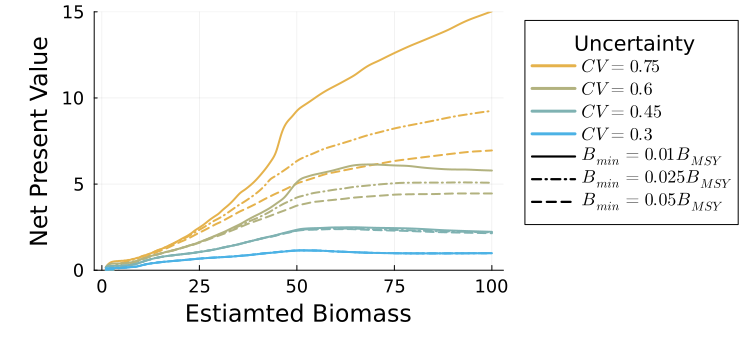

In [215]:
using Colors
using LaTeXStrings
Bhat = (1:(0.00125*2*BaseParams.MSY/BaseParams.Fmsy):(2*BaseParams.MSY/BaseParams.Fmsy))
CV = [0.3,0.45,0.6,0.75]
acc_01 = zeros(length(Bhat),length(CV));n=0
acc_025 = zeros(length(Bhat),length(CV));n=0
acc_05 = zeros(length(Bhat),length(CV));n=0
for i in 1:length(Bhat)
    for j in 1:length(CV)
        n+=1;Var = log(CV[j]^2+1);mu = log(Bhat[i]) .- 0.5*Var 
        acc_01[i,j] = model_01.VoI([mu,Var])
        acc_025[i,j] = model_025.VoI([mu,Var])
        acc_05[i,j] = model_05.VoI([mu,Var])
    end
end 


plt=Plots.plot(Bhat,acc_05[:,4],label = "",c = Colors.RGB(0.9,0.7,0.3), width = 2, linestyle = :dash)
Plots.plot!(Bhat,acc_025[:,4],label = "",c = Colors.RGB(0.9,0.7,0.3), width = 2, linestyle = :dashdot)
Plots.plot!(Bhat,acc_01[:,4],label = L"CV = 0.75",c = Colors.RGB(0.9,0.7,0.3), width = 2)

Plots.plot!(Bhat,acc_05[:,3],label = "",c = Colors.RGB(0.7,0.7,0.5), width = 2, linestyle = :dash)
Plots.plot!(Bhat,acc_025[:,3],label = "",c = Colors.RGB(0.7,0.7,0.5), width = 2, linestyle = :dashdot)
Plots.plot!(Bhat,acc_01[:,3],label = L"CV = 0.6",c = Colors.RGB(0.7,0.7,0.5), width = 2,
            ylabel = "Net Present Value", xlabel = "Estiamted Biomass",legendtitle = "Uncertainty",
            legendfontsize = 12,legendtitlefontsize = 14, legendposition = :outertopright,
            labelfontsize = 16, tickfontsize = 12, legendpo = false)


Plots.plot!(Bhat,acc_05[:,2],label = "",c = Colors.RGB(0.5,0.7,0.7), width = 2, linestyle = :dash)
Plots.plot!(Bhat,acc_025[:,2],label = "",c = Colors.RGB(0.5,0.7,0.7), width = 2, linestyle = :dashdot)
Plots.plot!(Bhat,acc_01[:,2],label = L"CV = 0.45",c = Colors.RGB(0.5,0.7,0.7), width = 2)

Plots.plot!(Bhat,acc_05[:,1],label = "",c = Colors.RGB(0.3,0.7,0.9), width = 2, linestyle = :dash)
Plots.plot!(Bhat,acc_025[:,1],label = "",c = Colors.RGB(0.3,0.7,0.9), width = 2, linestyle = :dashdot)
Plots.plot!(Bhat,acc_01[:,1],label = L"CV = 0.3",c = Colors.RGB(0.3,0.7,0.9), width = 2)
Plots.hline!([-1], label = string(L"B_{min} = 0.01B_{MSY}"), ylims = (0,15), color = "black", width = 1.5)
Plots.hline!([-1],linestyle = :dashdot, label = string(L"B_{min} = 0.025B_{MSY}"), color = "black", width = 1.5)
Plots.hline!([-1],linestyle = :dash, label = string(L"B_{min} = 0.05B_{MSY}"), color = "black", width = 1.5)
using Measures

savefig(plot(plt, size = (750,350), bottom_margin = 10mm, left_margin = 10mm),"data/VoI_Bmin_sensetivity.png")
plot(plt, size = (750,350), bottom_margin = 10mm, left_margin = 10mm)

In [195]:
import Pkg; Pkg.add("Measures")
using Measures

    Updating registry at `~/.julia/registries/JuliaComputingRegistry`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Wayland_jll ─── v1.21.0+1
   Installed EpollShim_jll ─ v0.0.20230411+0
   Installed xkbcommon_jll ─ v1.4.1+1
    Updating `~/.julia/environments/v1.7/Project.toml`
  [442fdcdd] + Measures v0.3.2
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [2702e6a9] + EpollShim_jll v0.0.20230411+0
  [a2964d1f] ↑ Wayland_jll v1.21.0+0 ⇒ v1.21.0+1
  [d8fb68d0] ↑ xkbcommon_jll v1.4.1+0 ⇒ v1.4.1+1
Precompiling project...
  ✓ EpollShim_jll
  ✓ Wayland_jll
  ✓ xkbcommon_jll
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  ✓ StatsPlots
  ✓ LaplaceRedux
  9 dependencies successfully precompiled in 70 seconds (488 already precompiled, 2 skipped during auto due to previous errors)
  4 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
